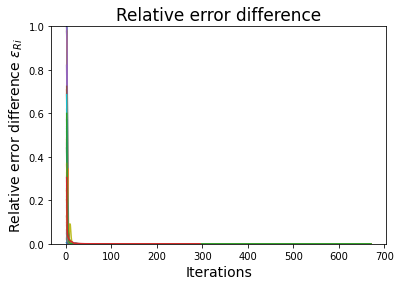

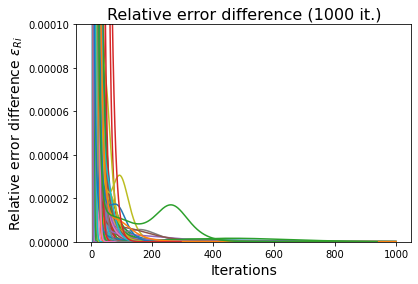

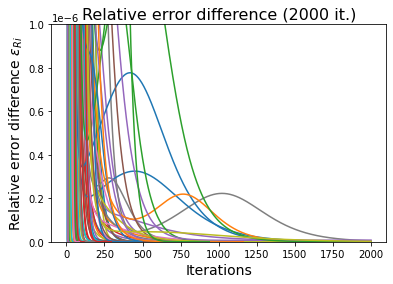

In [93]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def plot_by_iterations(df_list, num_it, **kwargs):
  top_ylim = kwargs.get('top_ylim', None);
  bottom_ylim = kwargs.get('bottom_ylim', None);
  for df in df_list:
     if num_it == -1:
       num_it = len(df["ErrorRatio"]);
     len_df = len(df["ErrorRatio"][:num_it]);
     plt.ylim(top=top_ylim, bottom=bottom_ylim)
     plt.plot([i for i in range(1,len_df+1)],df["ErrorRatio"][:num_it]);

head_dir = "Preliminary_Random_ErrGradAnalysis/logs";

dfs = []
for file_name in os.listdir(head_dir):
  df = pd.read_csv(head_dir + "/" + file_name);
  df['ErrorRatio'] = (abs(df['Error'] - df['Error'].shift(1))).div(df['Error'].shift(1))
  dfs.append(df);

# Plot of the curves for all iterations
plt.figure();
plt.title("Relative error difference", fontsize=17)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plot_by_iterations(dfs, -1, bottom_ylim=pow(10, -12), top_ylim=1);

#Plot of the curves for the first 1000 iterations
plt.figure();
plt.title("Relative error difference (1000 it.)", fontsize=16)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plot_by_iterations(dfs, 1000, top_ylim=pow(10, -4));

#Plot of the curves for the first 2000 iterations
plt.figure();
plt.title("Relative error difference (2000 it.)", fontsize=16)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plot_by_iterations(dfs, 2000, top_ylim=pow(10, -6));

# **Plot on specific iteration range**

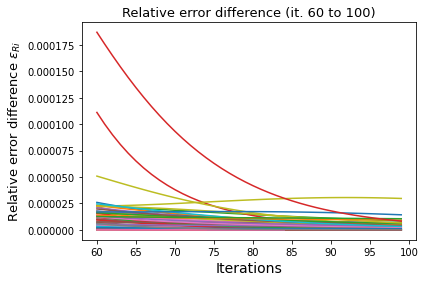

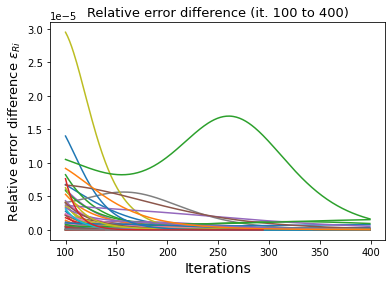

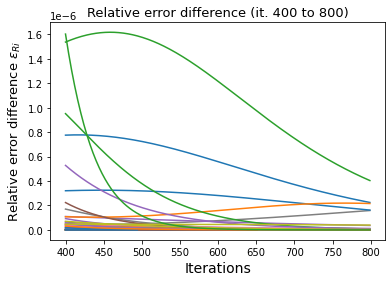

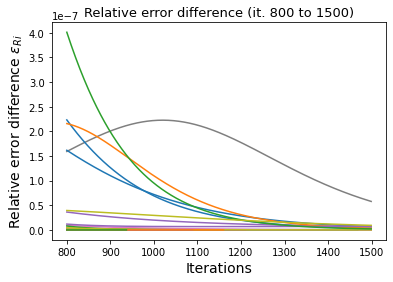

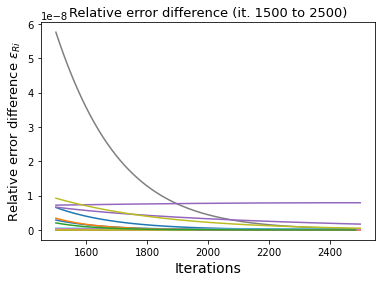

In [102]:
def range_iterations(lowlim, highlim, df_list):
  for df in df_list:
    len_df = len(df["ErrorRatio"][lowlim:highlim]);
    plt.plot(df["ErrorRatio"][lowlim:highlim]);

plt.figure();
plt.title("Relative error difference (it. 60 to 100)", fontsize=13)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=13)
plt.xlabel("Iterations", fontsize=14)
range_iterations(60, 100, dfs);

plt.figure();
plt.title("Relative error difference (it. 100 to 400)", fontsize=13)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=13)
plt.xlabel("Iterations", fontsize=14)
range_iterations(100,400, dfs);

plt.figure();
plt.title("Relative error difference (it. 400 to 800)", fontsize=13)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=13)
plt.xlabel("Iterations", fontsize=14)
range_iterations(400,800, dfs);

plt.figure();
plt.title("Relative error difference (it. 800 to 1500)", fontsize=13)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
range_iterations(800,1500, dfs);

plt.figure();
plt.title("Relative error difference (it. 1500 to 2500)", fontsize=13)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=13)
plt.xlabel("Iterations", fontsize=14)
range_iterations(1500,2500, dfs);


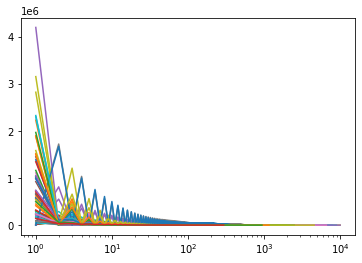

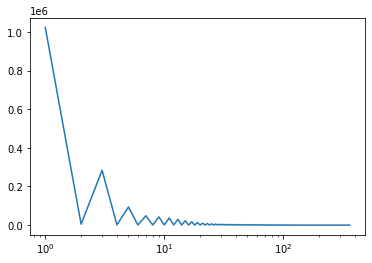

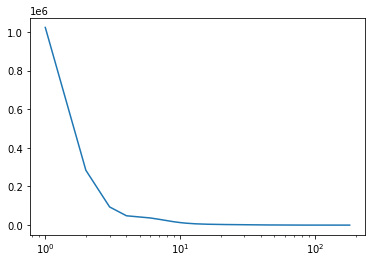

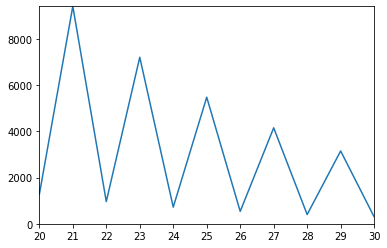

In [72]:
plt.figure();
for df in dfs:
    len_df = len(df["GradientNorm"]);
    plt.xscale('log');
    #plt.ylim(top=top_ylim, bottom=bottom_ylim)
    plt.plot([i for i in range(1,len_df+1)],df["GradientNorm"]);

plt.figure();
df = dfs[50];
len_df = len(df["GradientNorm"]);
plt.xscale('log');
#plt.ylim(top=top_ylim, bottom=bottom_ylim)
plt.plot([i for i in range(1,len_df+1)],df["GradientNorm"]);

plt.figure();
df = dfs[50].iloc[::2];
len_df = len(df["GradientNorm"]);
plt.xscale('log');
#plt.ylim(top=top_ylim, bottom=bottom_ylim)
plt.plot([i for i in range(1,len_df+1)],df["GradientNorm"]);

plt.figure();
df = dfs[25];
len_df = len(df["GradientNorm"]);
plt.xlim(left=20, right=30);
plt.ylim(top=max(df["GradientNorm"][20:30]));
#plt.xscale('log');
plt.xticks(range(20,31));
#plt.ylim(top=pow(10, 2), bottom=10)
plt.plot([i for i in range(1,len_df+1)],df["GradientNorm"]);